In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('preprocessed_data.csv')

In [54]:
df['energy_mark'].value_counts()

energy_mark
none    836
A15     243
A20     231
C       208
D       113
A10      82
B        68
E        29
F         8
G         3
Name: count, dtype: int64

In [55]:
df[df.select_dtypes(include=['object']).columns.tolist()].columns

Index(['housing_type', 'furnished', 'roommate_friendly', 'pets_allowed',
       'elevator', 'senior_friendly', 'students_only', 'balcony_terrace',
       'parking', 'dishwasher', 'washing_machine', 'charging_station', 'dryer',
       'energy_mark', 'area', 'availability_in'],
      dtype='object')

### First Attempt of Summary Statistics

In [56]:
from scipy import stats
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['monthly_rent']))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
df[z_scores > threshold]['move_in_price'] / df[z_scores > threshold]['monthly_rent']

177     5.031080
243     5.098709
292     2.085285
296     7.076408
331     5.105296
397     4.599661
520     5.073517
523     5.073517
525     5.073517
527     5.073517
529     5.073517
532     5.073517
639     5.031080
1480    7.096463
dtype: float64

In [57]:
z_scores = np.abs(stats.zscore(df['monthly_aconto']))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
df[z_scores > threshold]

,monthly_rent,monthly_aconto,move_in_price,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,...,dishwasher,washing_machine,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in,total_monthly_rent
77,25000.0,2500.0,102500.0,Lejlighed,160.0,7,2,Nej,Ja,Nej,...,Ja,Ja,Ikke angivet,Ja,75000.0,0.0,D,Valby,<1 month,27500.0
365,18500.0,2300.0,76300.0,Lejlighed,93.0,3,0,Nej,Nej,Nej,...,Ja,Ja,Ikke angivet,Ja,37000.0,18500.0,none,Vedbæk,<1 month,20800.0
584,25100.0,2440.0,127940.0,Lejlighed,108.0,3,2,Nej,Nej,Nej,...,Ikke angivet,Ikke angivet,Nej,Nej,75300.0,25100.0,none,Hellerup,3+ months,27540.0
641,14800.0,2500.0,106100.0,Lejlighed,140.0,5,2,Nej,Nej,Nej,...,Nej,Ikke angivet,Ja,Ikke angivet,44400.0,44400.0,D,Glostrup,<1 month,17300.0
643,65000.0,2500.0,312500.0,Lejlighed,253.0,6,1,Ja,Nej,Nej,...,Ja,Ja,Ikke angivet,Ja,180000.0,65000.0,C,København Ø,<1 month,67500.0
711,22100.0,3099.0,91499.0,Lejlighed,146.0,5,0,Nej,Ja,Ja,...,Ja,Ja,Ikke angivet,Ja,66300.0,0.0,C,Valby,3+ months,25199.0
769,23925.0,2500.0,146050.0,Lejlighed,174.0,6,1,Nej,Nej,Nej,...,Ja,Nej,Ikke angivet,Nej,71775.0,47850.0,D,Frederiksberg,<1 month,26425.0
832,39500.0,2500.0,160500.0,Lejlighed,250.0,7,4,Ja,Ja,Ja,...,Ja,Ja,Ja,Ja,118500.0,0.0,C,Hellerup,<1 month,42000.0
1080,46500.0,2750.0,188750.0,Lejlighed,300.0,8,3,Nej,Nej,Nej,...,Ikke angivet,Ikke angivet,Ikke angivet,Ikke angivet,139500.0,0.0,none,København K,3+ months,49250.0
1157,22000.0,2800.0,90800.0,Lejlighed,120.0,4,0,Nej,Nej,Nej,...,Ja,Ja,Ikke angivet,Ja,44000.0,22000.0,D,Gentofte,<1 month,24800.0


In [58]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto  move_in_price     size_sqm        rooms  \
count  1.821000e+03     1821.000000   1.821000e+03  1821.000000  1821.000000   
mean   2.408824e+04      798.379462   1.177969e+05    74.945085     2.535969   
std    1.244774e+05      491.094945   6.379928e+05    40.110661     1.211414   
min    3.127000e+03        0.000000   4.000000e+03     6.000000     1.000000   
25%    9.600000e+03      500.000000   4.178000e+04    42.000000     1.000000   
50%    1.230000e+04      800.000000   6.045000e+04    79.000000     3.000000   
75%    1.520000e+04     1000.000000   7.500000e+04    98.000000     3.000000   
max    1.758802e+06     3099.000000   9.724167e+06   324.000000     8.000000   

             floor       deposit  prepaid_rent  total_monthly_rent  
count  1821.000000  1.821000e+03  1.821000e+03        1.821000e+03  
mean      2.322900  6.311357e+04  2.343146e+04        2.488662e+04  
std       2.365519  3.382125e+05  1.403508e+05      

In [59]:
continuous_vars = df.select_dtypes(include=['number']).columns.tolist()
continuous_ratio_vars = df.select_dtypes(include=['float64']).columns.tolist()

In [60]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    monthly_rent  monthly_aconto  move_in_price  size_sqm  \
monthly_rent            1.000000        0.075064       0.971365  0.108682   
monthly_aconto          0.075064        1.000000       0.076636  0.690344   
move_in_price           0.971365        0.076636       1.000000  0.108825   
size_sqm                0.108682        0.690344       0.108825  1.000000   
rooms                   0.117952        0.612423       0.112926  0.871846   
floor                  -0.022950        0.047057      -0.017530  0.066243   
deposit                 0.929467        0.077898       0.920679  0.109430   
prepaid_rent            0.830121        0.071276       0.879279  0.104133   
total_monthly_rent      0.999992        0.078985       0.971372  0.111372   

                       rooms     floor   deposit  prepaid_rent  \
monthly_rent        0.117952 -0.022950  0.929467      0.830121   
monthly_aconto      0.612423  0.047057  0.077898      0.071276   
move_in_pr

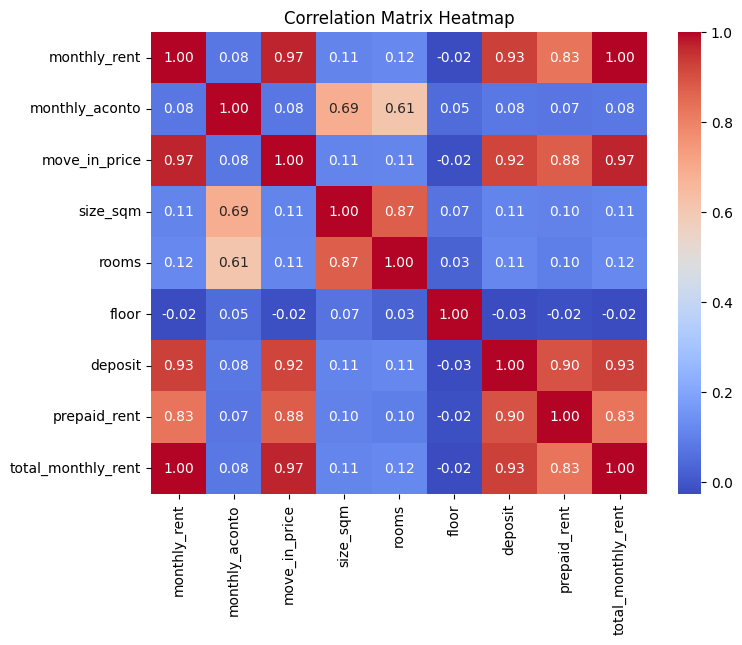

In [61]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [62]:
len(df[df['monthly_aconto']==0])/len(df)*100

14.387699066447007

In [63]:
np.max(df['monthly_aconto'])

np.float64(3099.0)

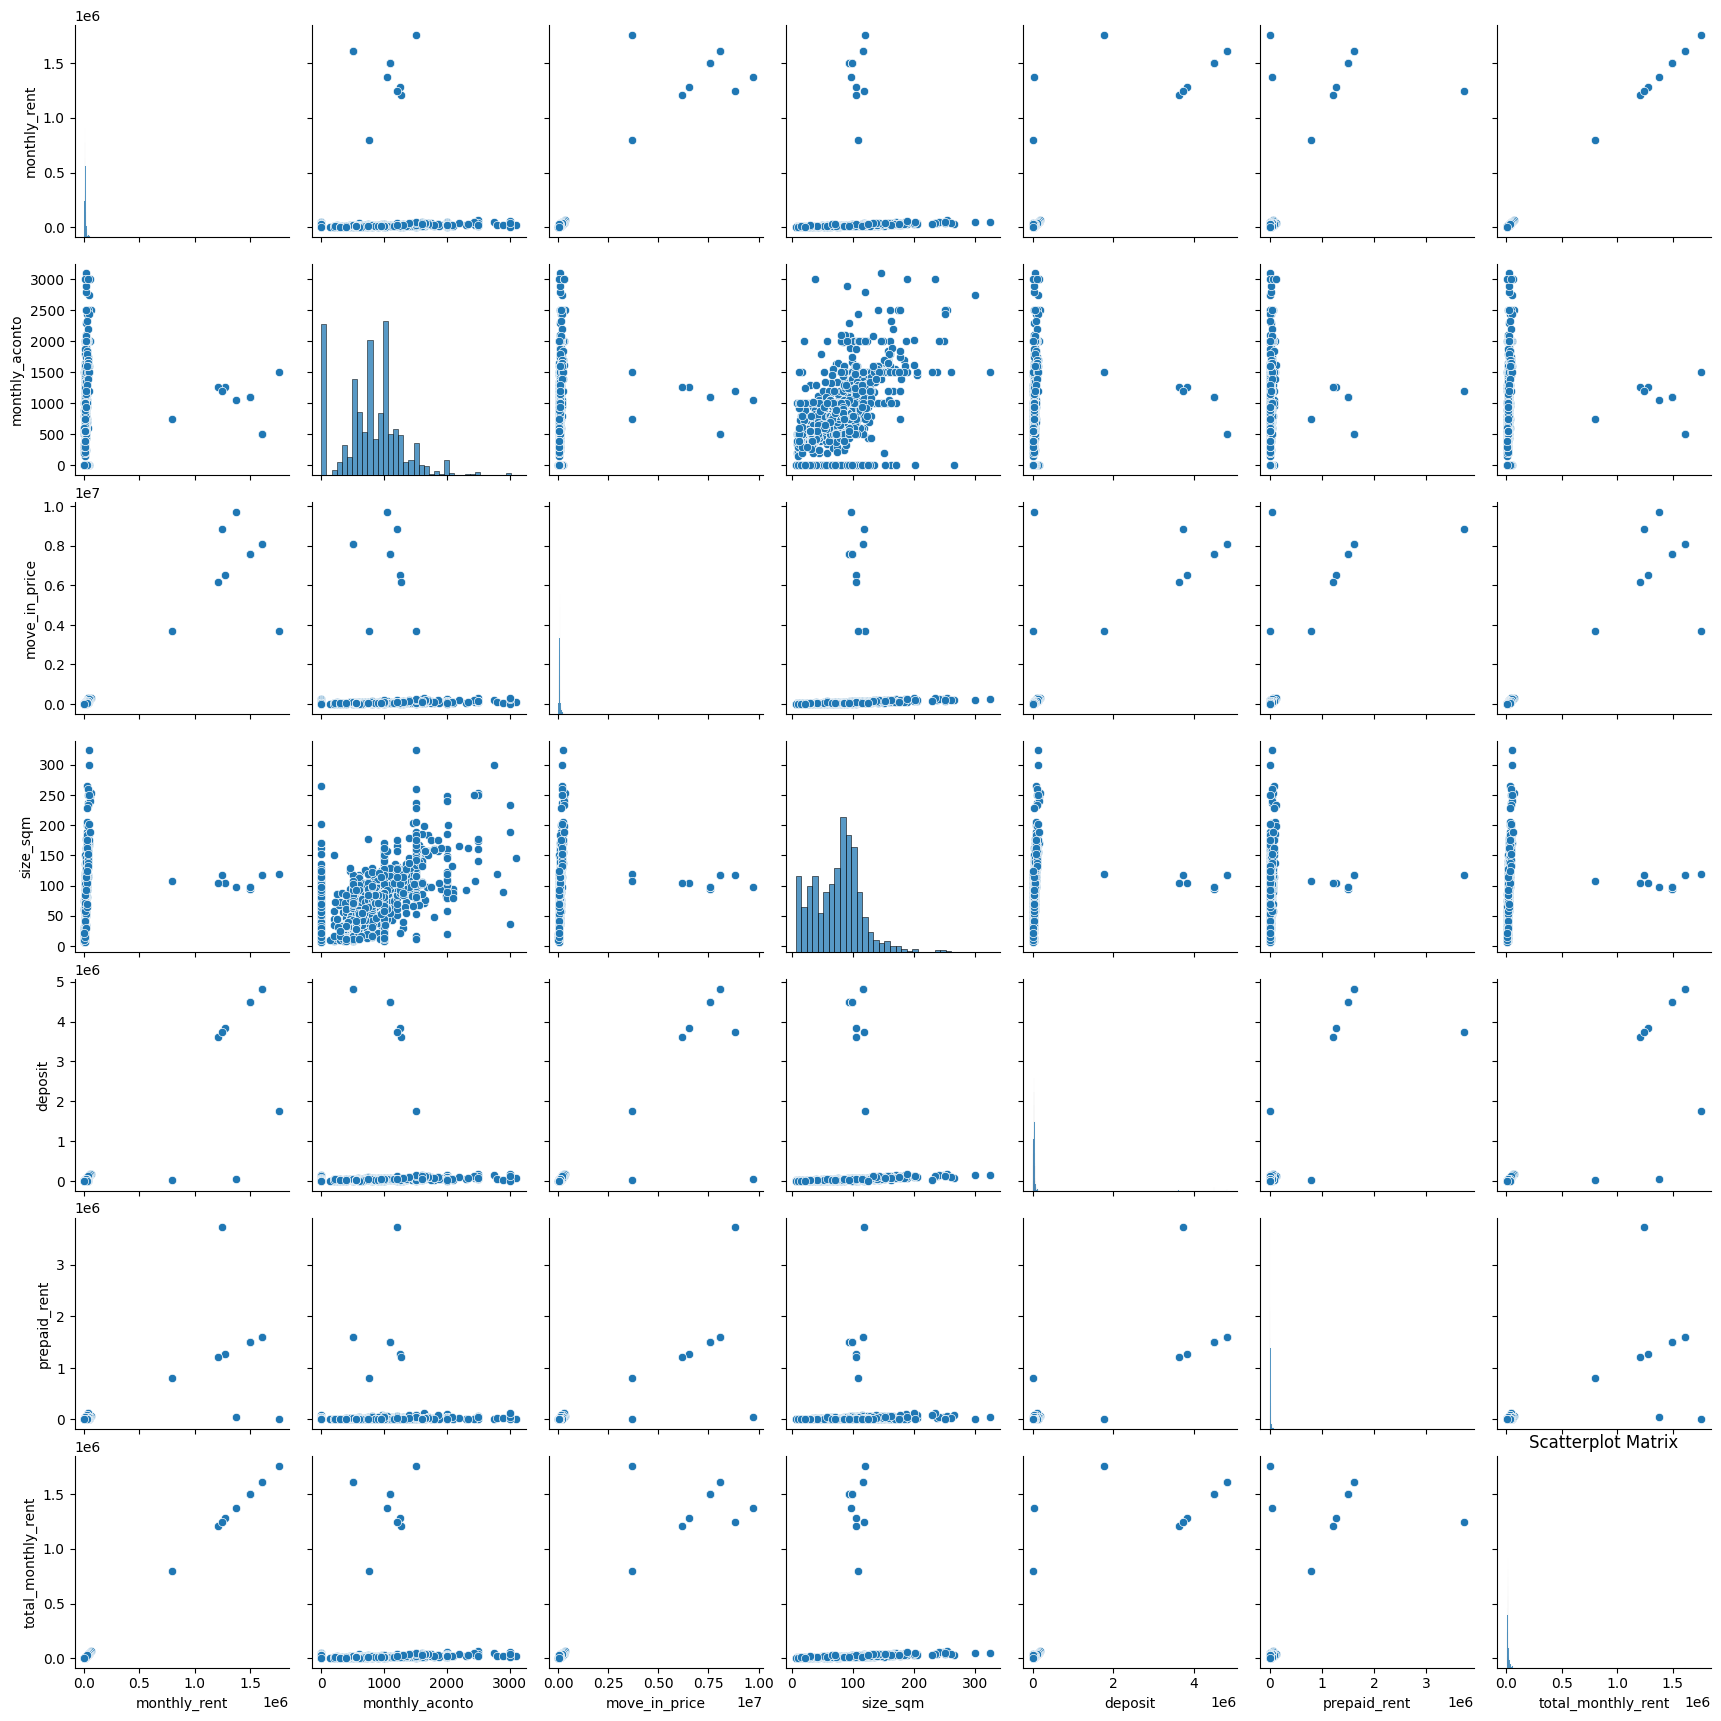

In [64]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[df.select_dtypes(include=['float64']).columns.tolist()])
plt.title('Scatterplot Matrix')
plt.show()

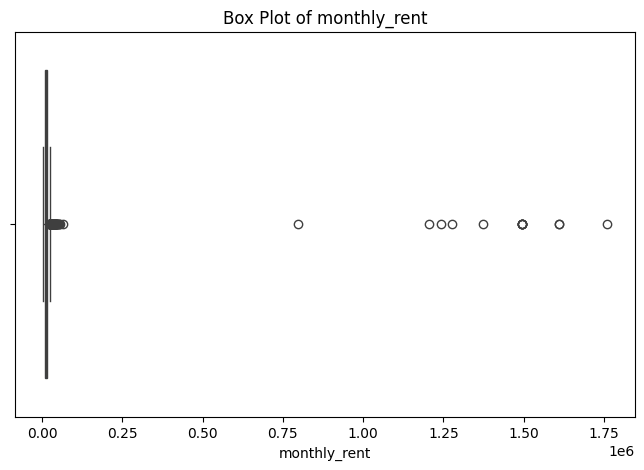

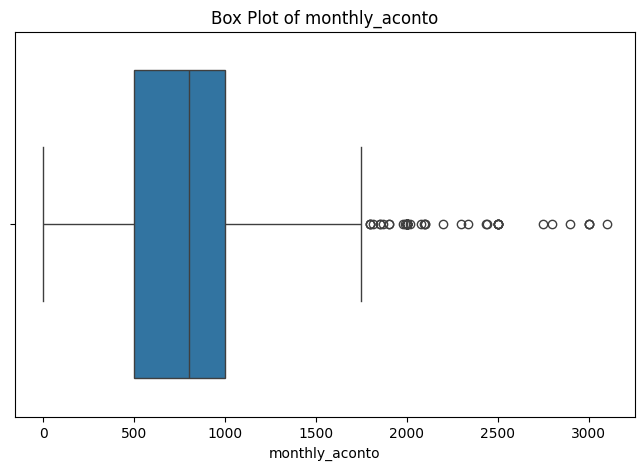

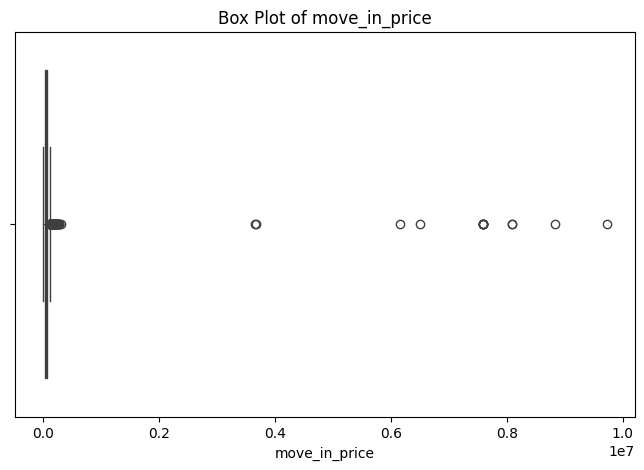

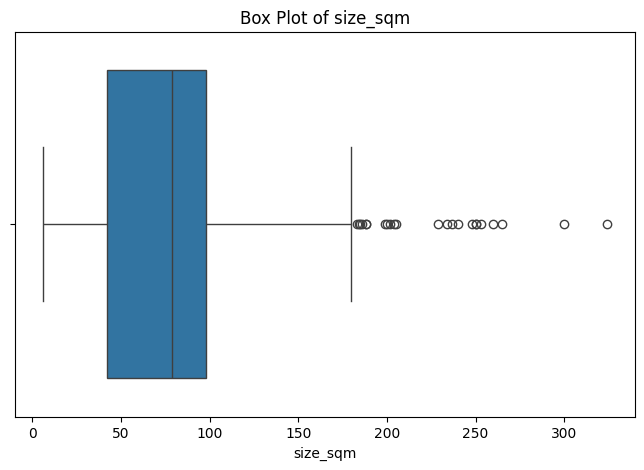

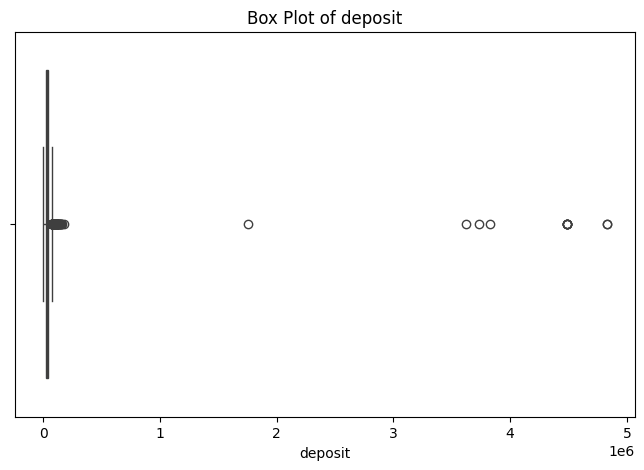

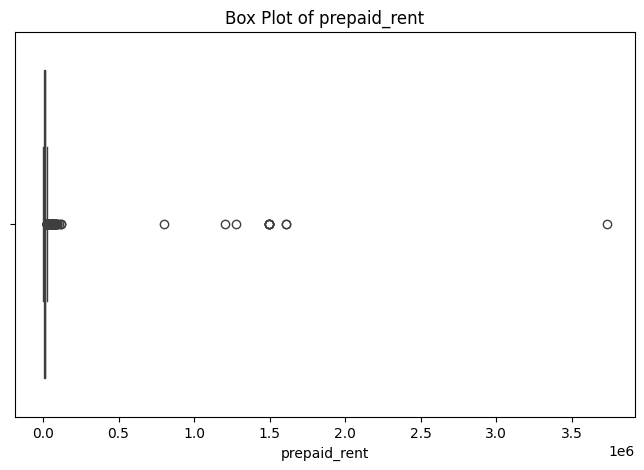

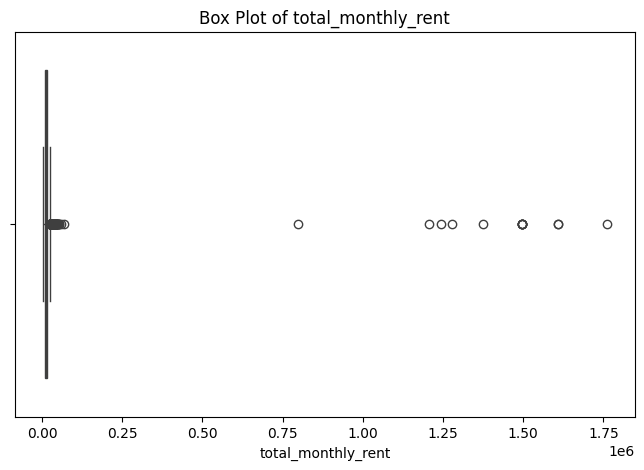

In [65]:
for var in df.select_dtypes(include=['float64']).columns.tolist():
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


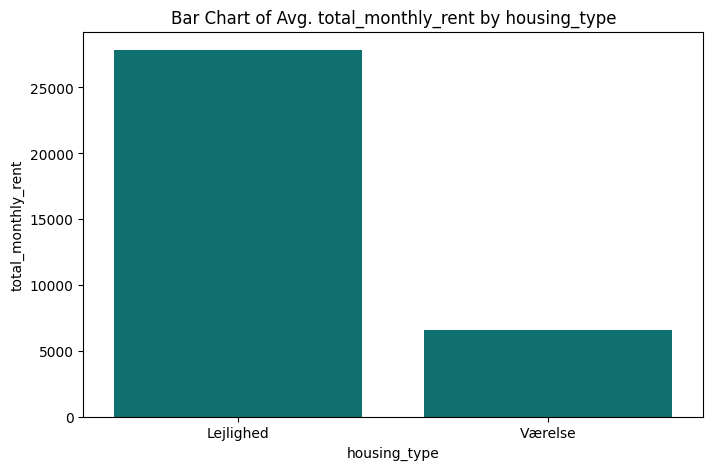

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


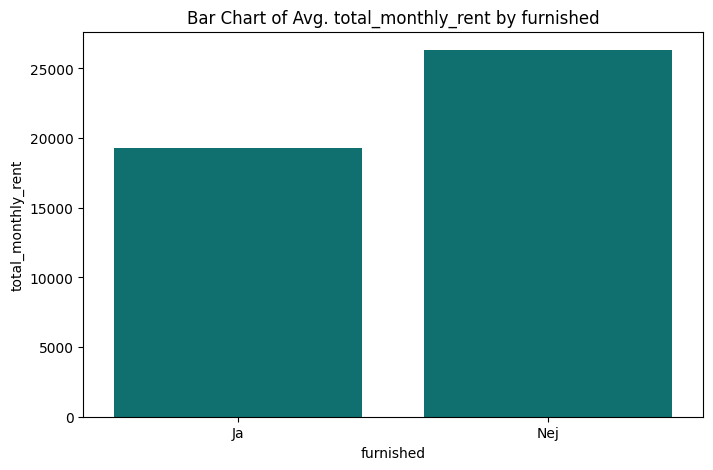

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


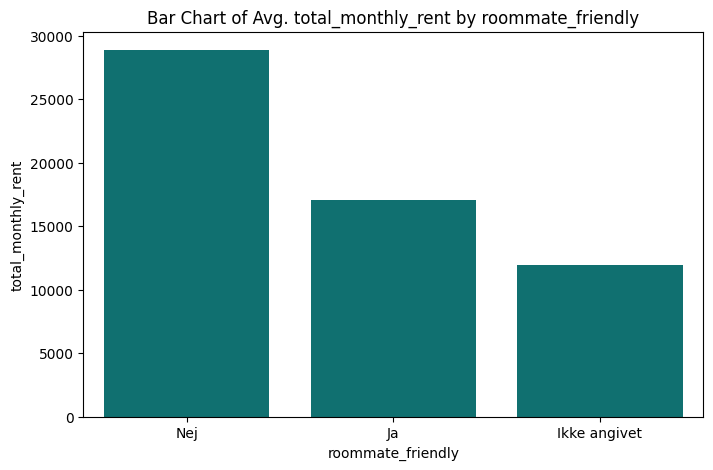

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


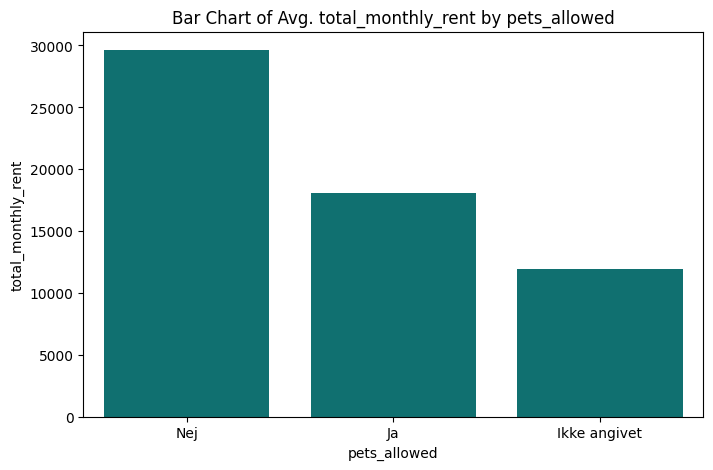

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


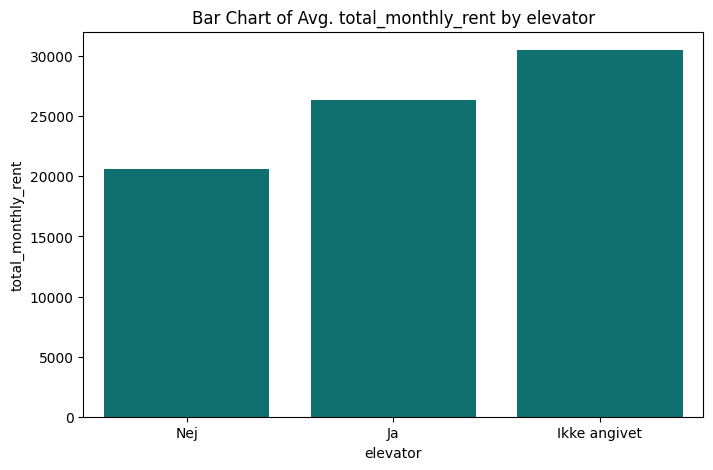

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


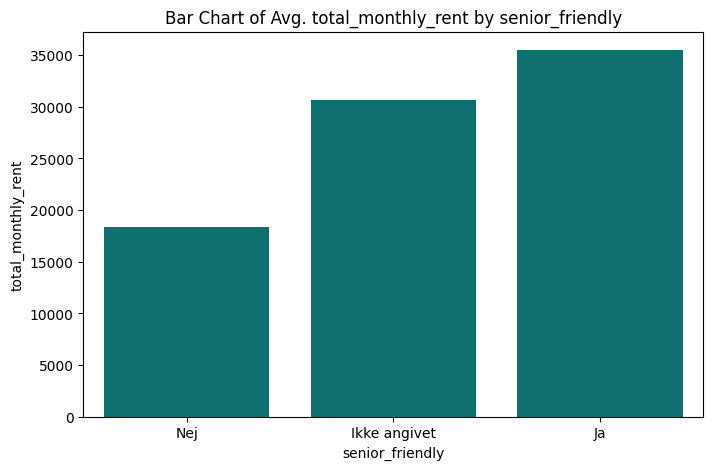

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


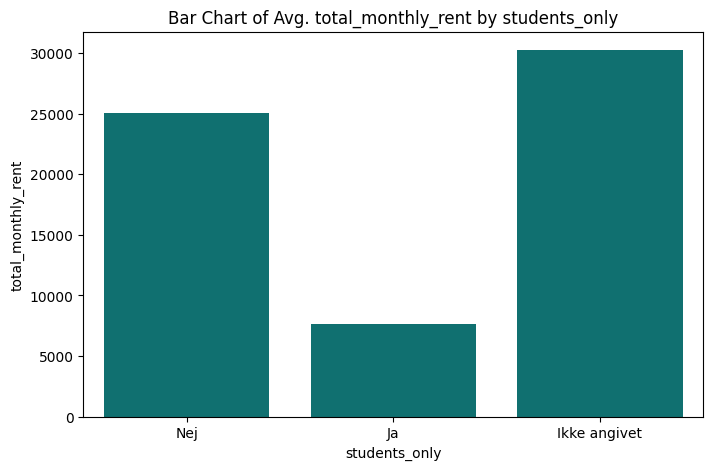

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


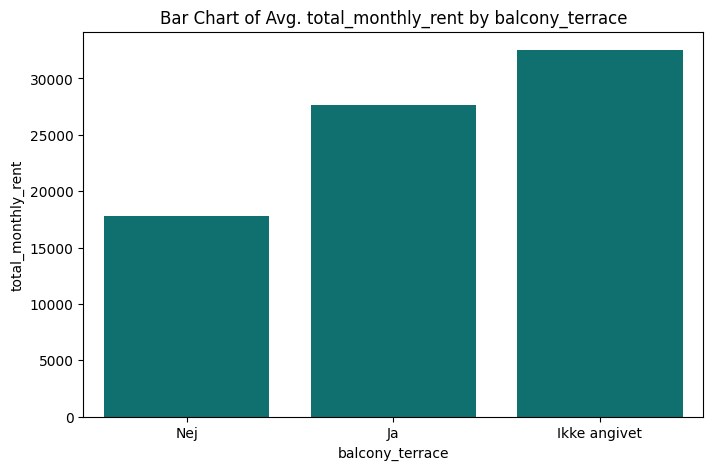

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


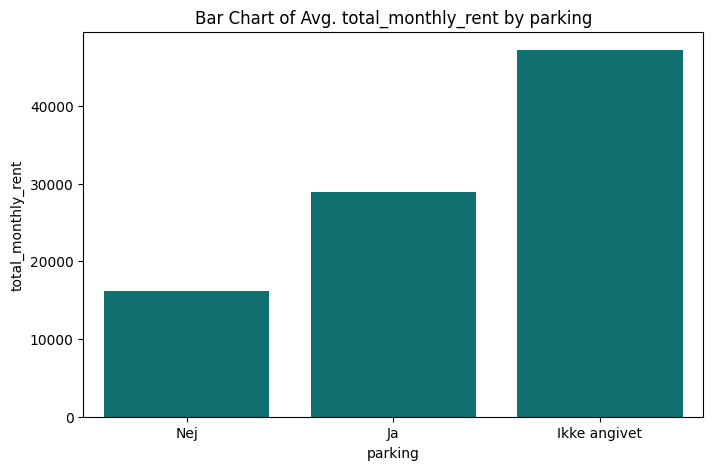

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


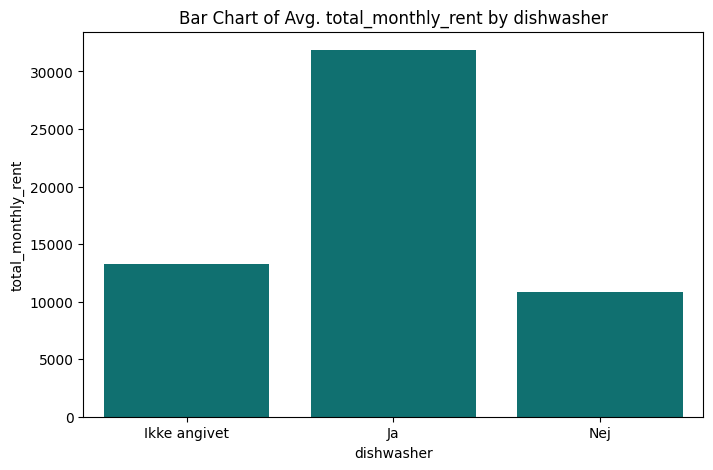

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


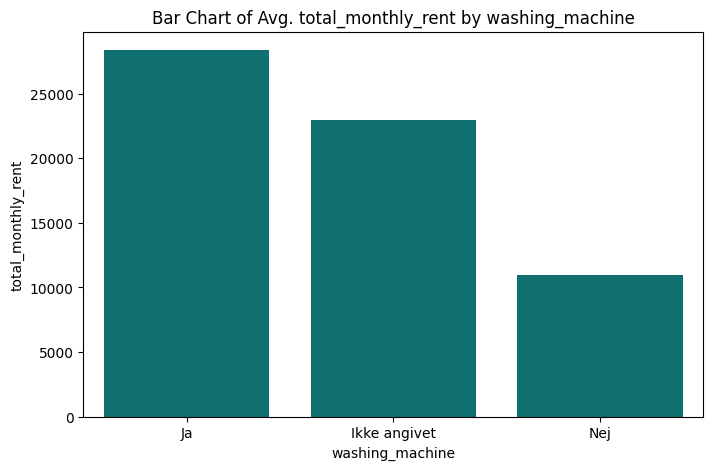

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


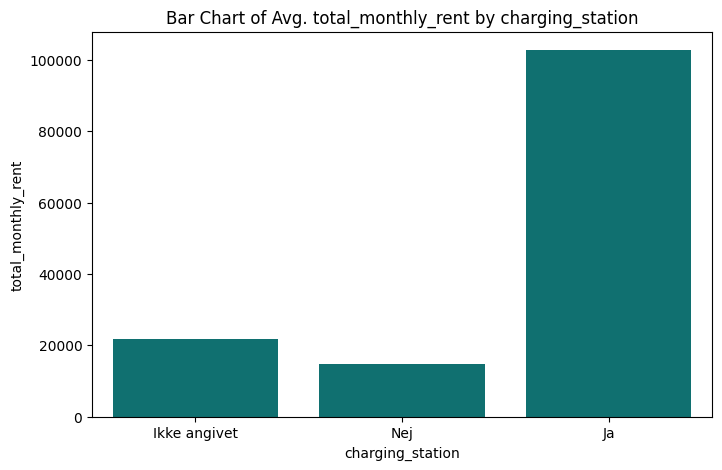

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


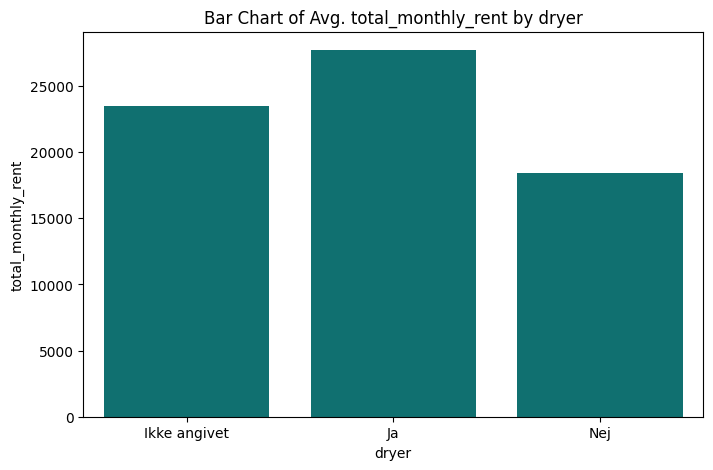

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


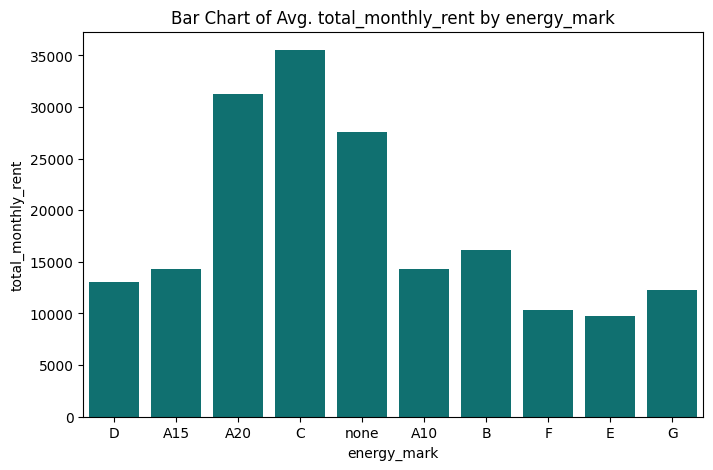

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


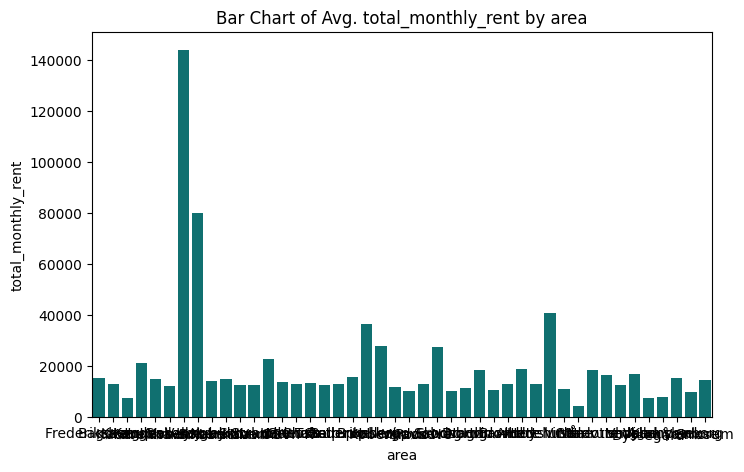

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_5510/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


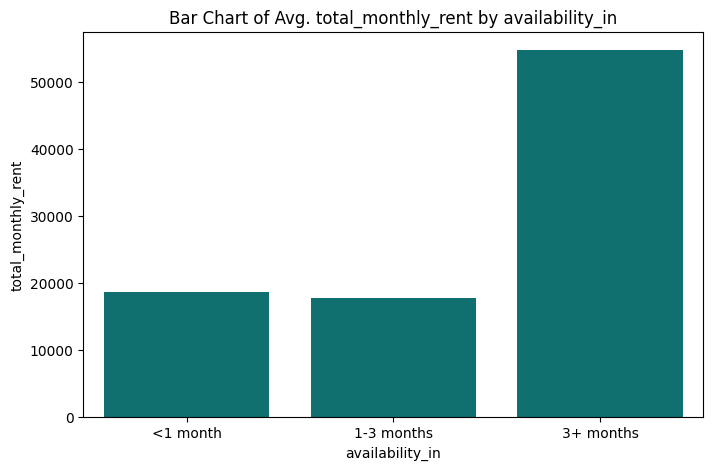

In [80]:
discrete_vars = df.select_dtypes(include=['object']).columns.tolist() 
continuous_var = 'total_monthly_rent' # We choose only the dependent variable we later want to predict


# Creating bar charts
for discrete_var in discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')
    plt.title(f'Bar Chart of Avg. {continuous_var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(continuous_var)
    plt.show()

In [67]:
df.head()

,monthly_rent,monthly_aconto,move_in_price,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,...,dishwasher,washing_machine,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in,total_monthly_rent
0,12850.0,1350.0,52750.0,Lejlighed,86.0,3,3,Ja,Nej,Nej,...,Ikke angivet,Ja,Ikke angivet,Ikke angivet,38550.0,0.0,D,Frederiksberg C,<1 month,14200.0
1,15700.0,1224.0,79724.0,Lejlighed,113.0,4,4,Nej,Nej,Ja,...,Ja,Ja,Nej,Ja,47100.0,15700.0,A15,Bagsværd,1-3 months,16924.0
2,5000.0,1000.0,21000.0,Værelse,9.0,1,0,Ja,Ja,Nej,...,Ikke angivet,Ja,Ikke angivet,Ja,15000.0,0.0,A20,Kastrup,1-3 months,6000.0
3,3500.0,500.0,11500.0,Værelse,14.0,1,0,Ja,Ja,Nej,...,Nej,Ja,Nej,Ja,4000.0,3500.0,C,København S,1-3 months,4000.0
4,4650.0,0.0,13950.0,Værelse,7.0,1,4,Ja,Nej,Nej,...,Ikke angivet,Ikke angivet,Ikke angivet,Ikke angivet,9300.0,0.0,none,København V,<1 month,4650.0


### Attempt with the log transformed variables

We were familiar with a technique to have more interpretable results, which is to transform the data with a function, in this case the log works for us, as the data has a long tail and contains outliers, so applying a log transformation to the variables helps normalize the distribution and make the histograms more interpretable.

In [68]:
for var in continuous_ratio_vars:
    if var!='size_sqm':
        df[f'{var}_log'] = np.log1p(df[var])

In [69]:
continuous_ratio_log_vars = [col for col in df.select_dtypes(include=['float64']).columns.tolist() if ('log' in col or col=='size_sqm')]

In [70]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto  move_in_price     size_sqm        rooms  \
count  1.821000e+03     1821.000000   1.821000e+03  1821.000000  1821.000000   
mean   2.408824e+04      798.379462   1.177969e+05    74.945085     2.535969   
std    1.244774e+05      491.094945   6.379928e+05    40.110661     1.211414   
min    3.127000e+03        0.000000   4.000000e+03     6.000000     1.000000   
25%    9.600000e+03      500.000000   4.178000e+04    42.000000     1.000000   
50%    1.230000e+04      800.000000   6.045000e+04    79.000000     3.000000   
75%    1.520000e+04     1000.000000   7.500000e+04    98.000000     3.000000   
max    1.758802e+06     3099.000000   9.724167e+06   324.000000     8.000000   

             floor       deposit  prepaid_rent  total_monthly_rent  \
count  1821.000000  1.821000e+03  1.821000e+03        1.821000e+03   
mean      2.322900  6.311357e+04  2.343146e+04        2.488662e+04   
std       2.365519  3.382125e+05  1.403508e+05   

In [71]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_ratio_log_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        size_sqm  monthly_rent_log  monthly_aconto_log  \
size_sqm                1.000000          0.681720            0.472508   
monthly_rent_log        0.681720          1.000000            0.357157   
monthly_aconto_log      0.472508          0.357157            1.000000   
move_in_price_log       0.698543          0.925090            0.523330   
deposit_log             0.537866          0.660118            0.494861   
prepaid_rent_log        0.246322          0.251044            0.360972   
total_monthly_rent_log  0.691646          0.998428            0.398658   

                        move_in_price_log  deposit_log  prepaid_rent_log  \
size_sqm                         0.698543     0.537866          0.246322   
monthly_rent_log                 0.925090     0.660118          0.251044   
monthly_aconto_log               0.523330     0.494861          0.360972   
move_in_price_log                1.000000     0.782516          0.475950   
deposi

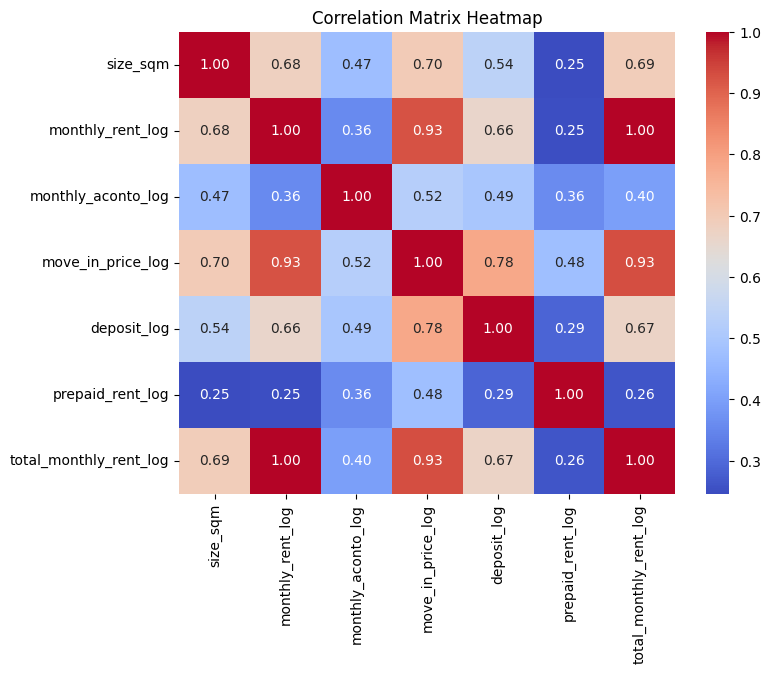

In [72]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

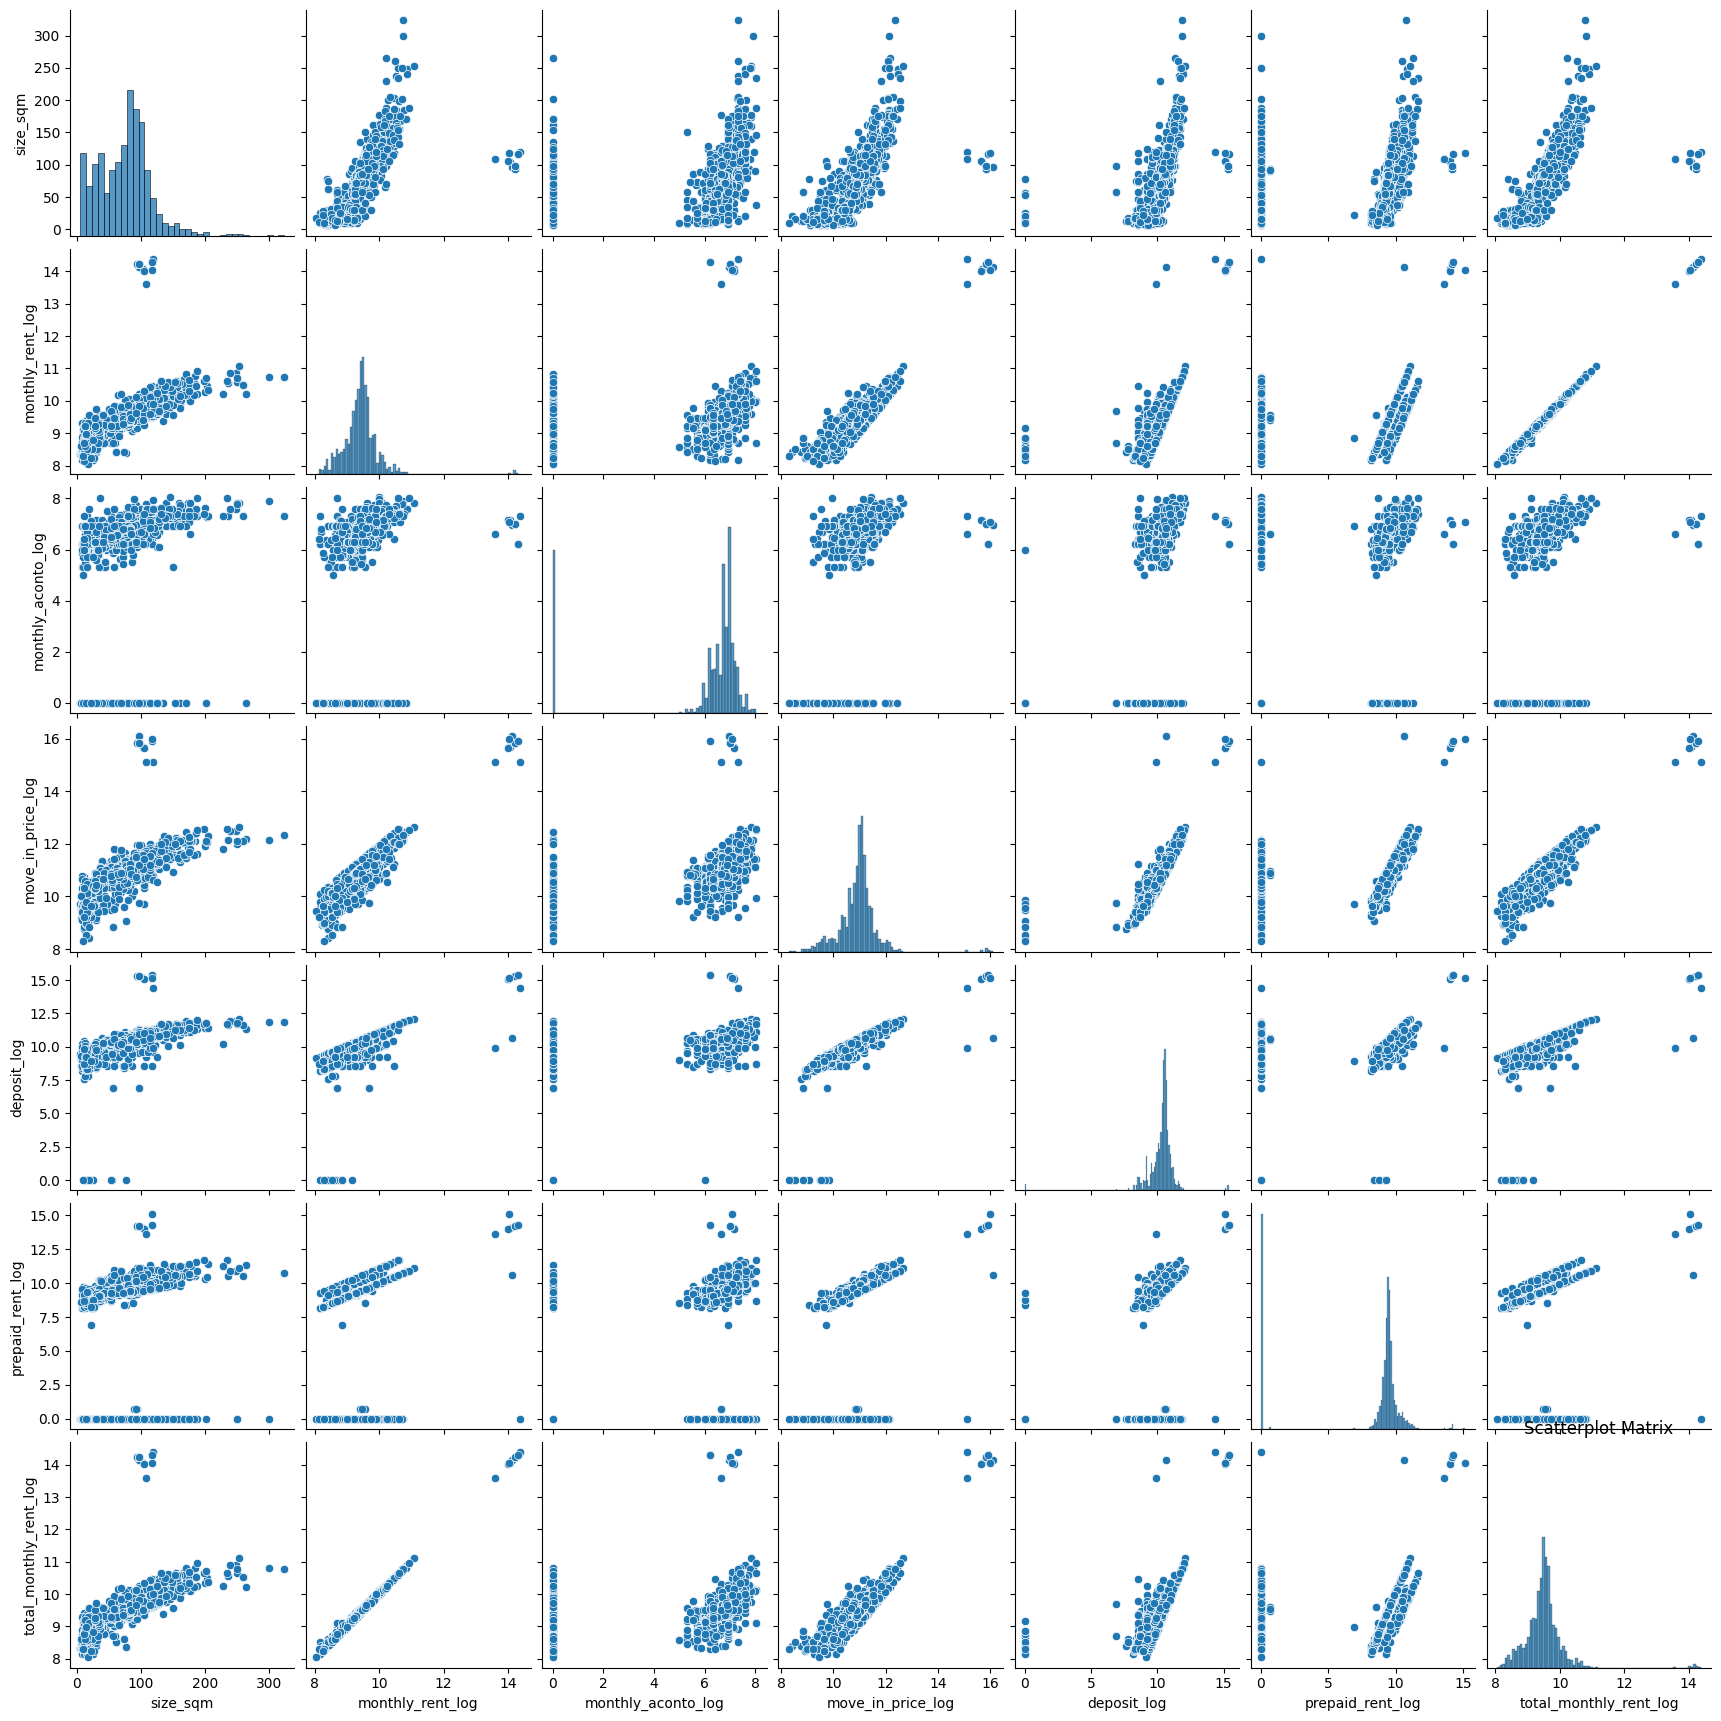

In [73]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[continuous_ratio_log_vars])
plt.title('Scatterplot Matrix')
plt.show()

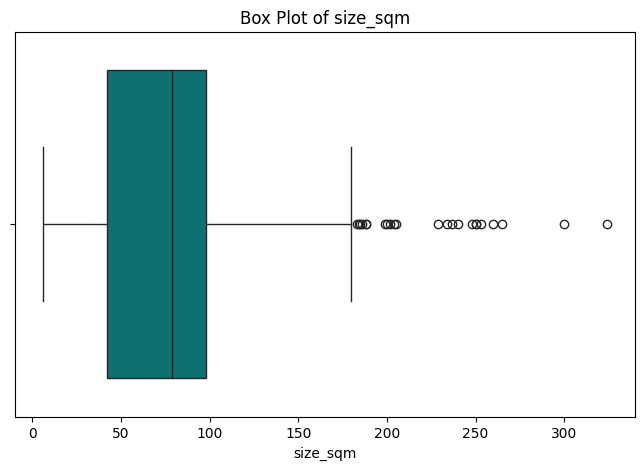

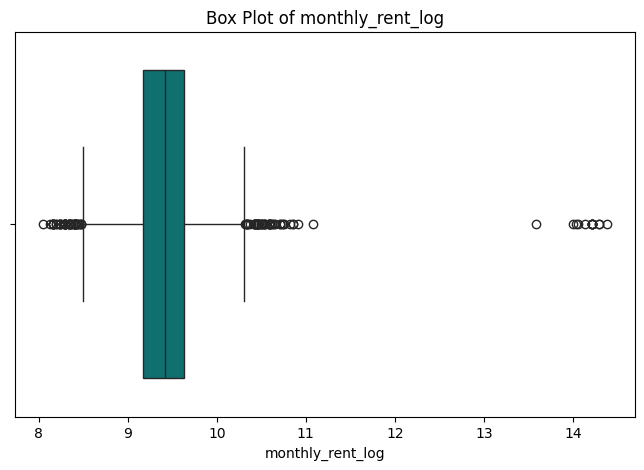

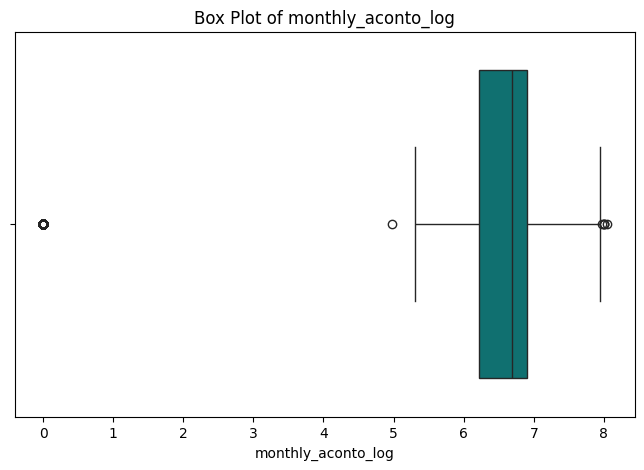

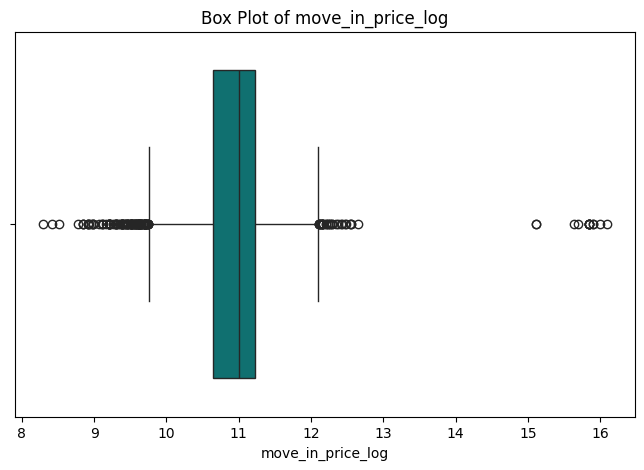

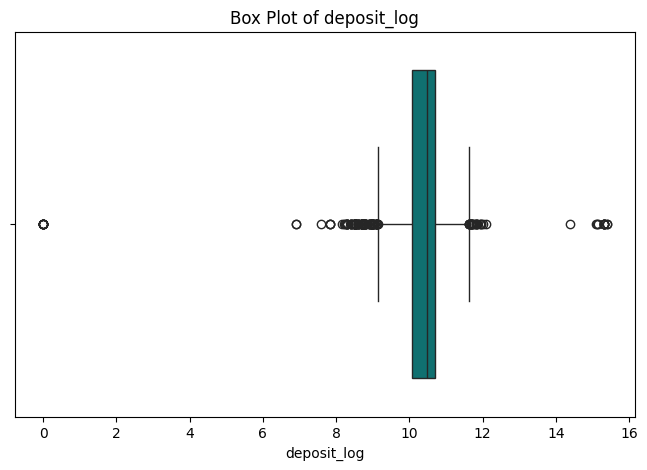

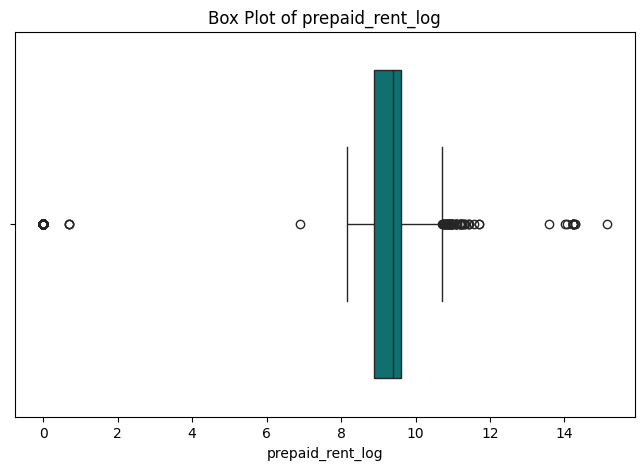

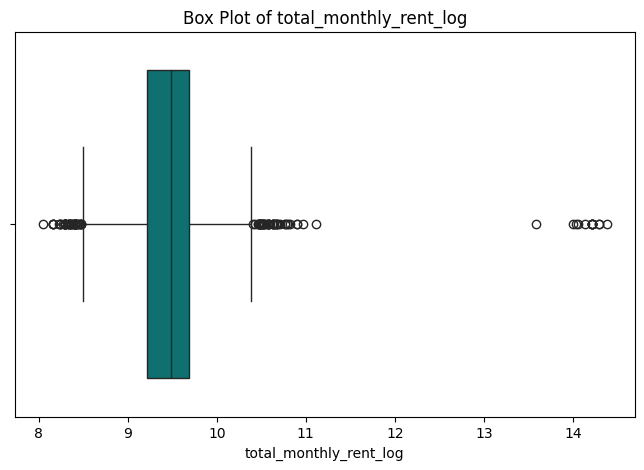

In [74]:
for var in continuous_ratio_log_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], color='teal')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

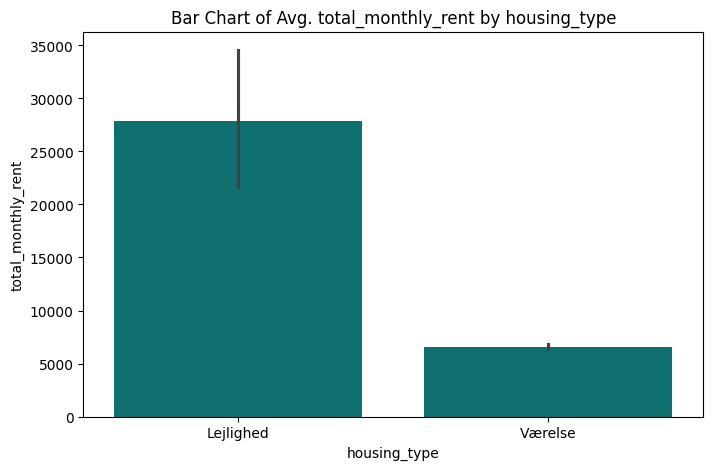

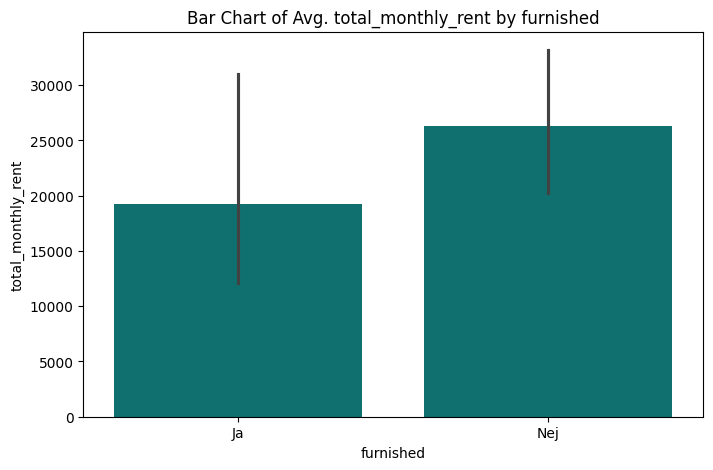

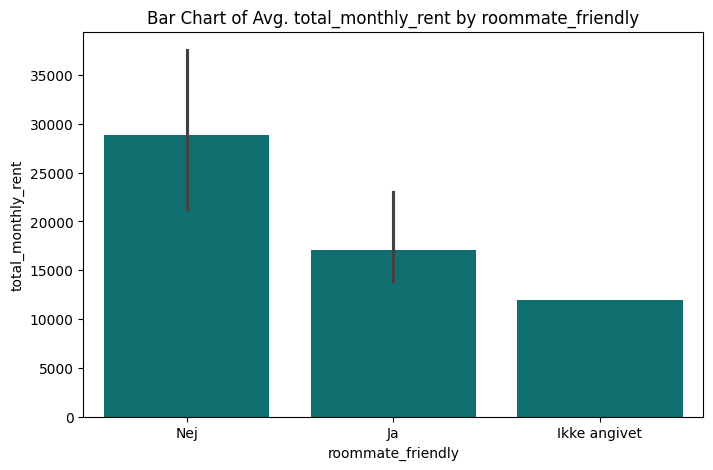

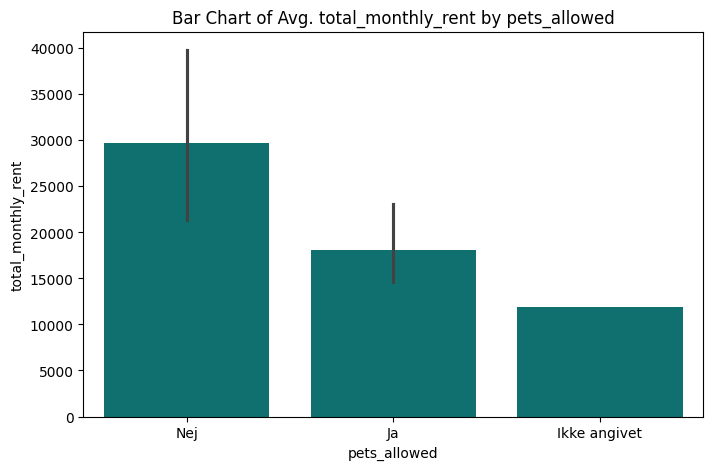

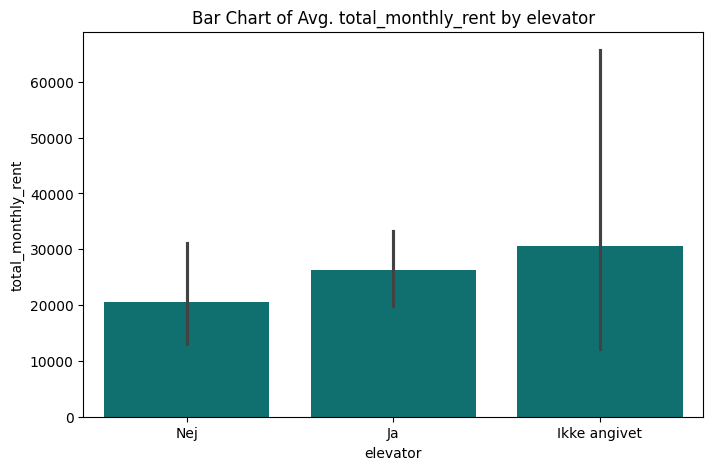

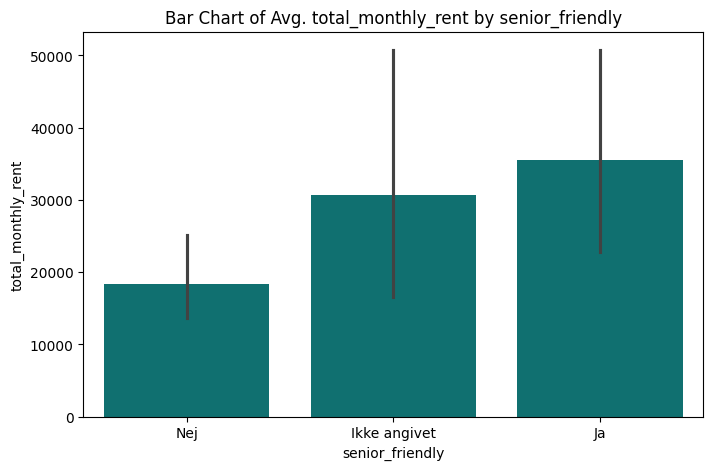

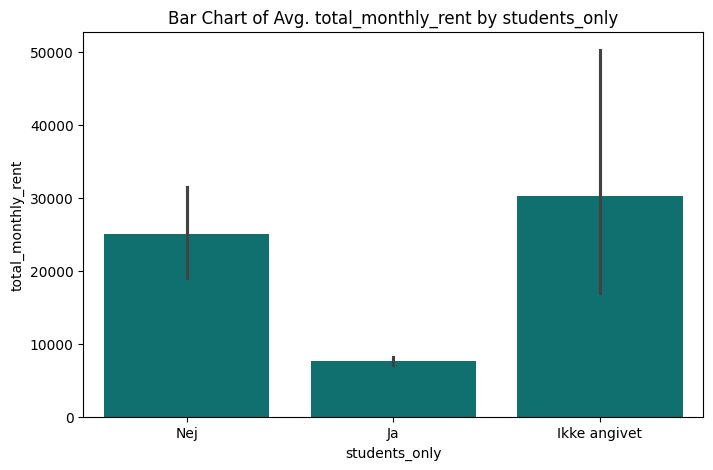

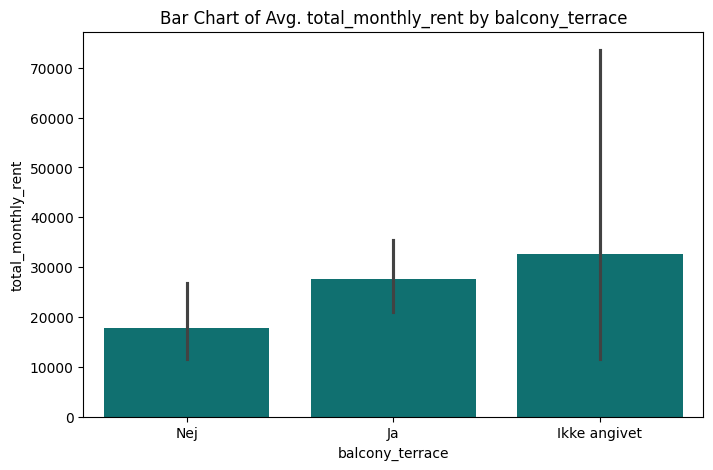

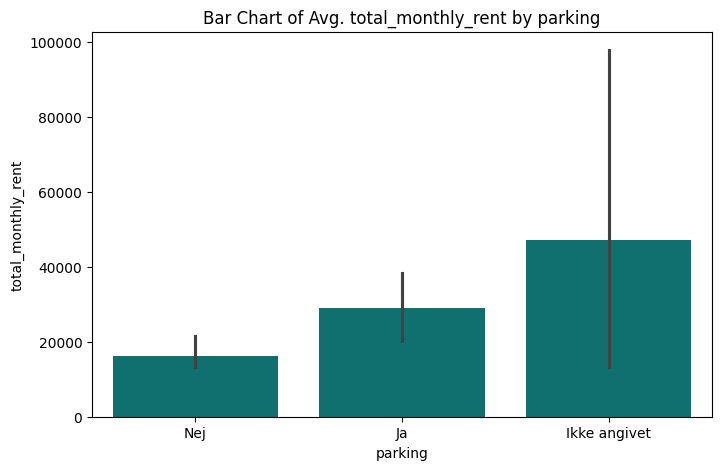

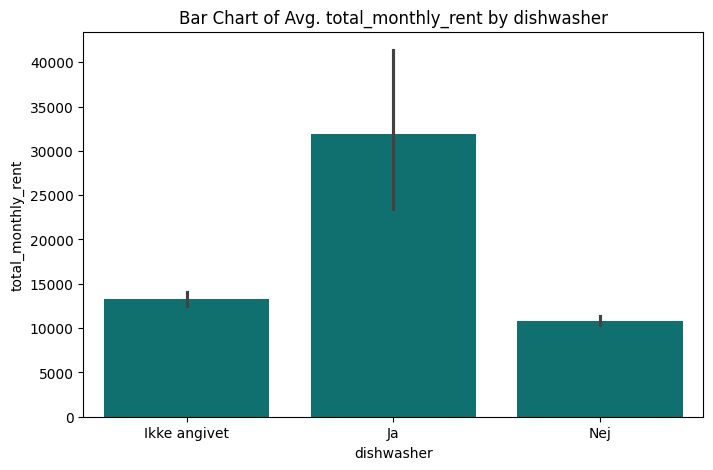

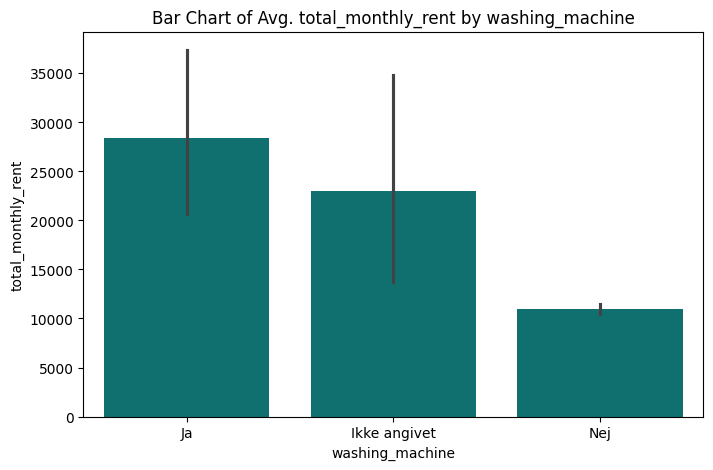

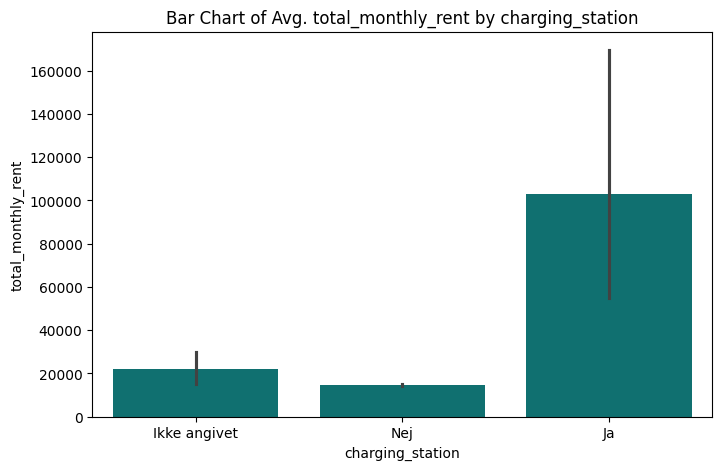

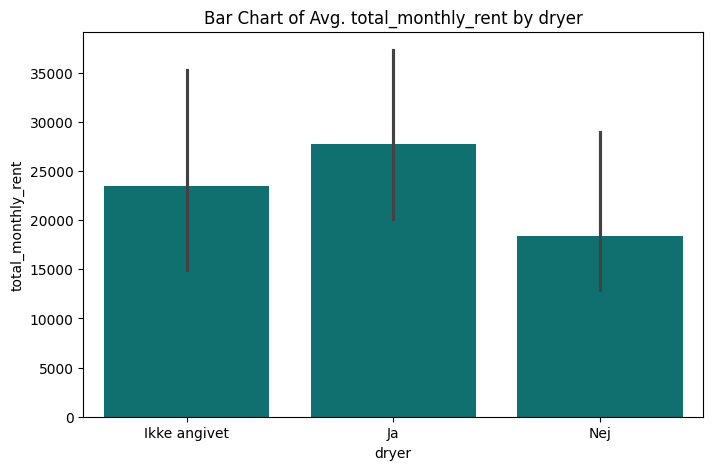

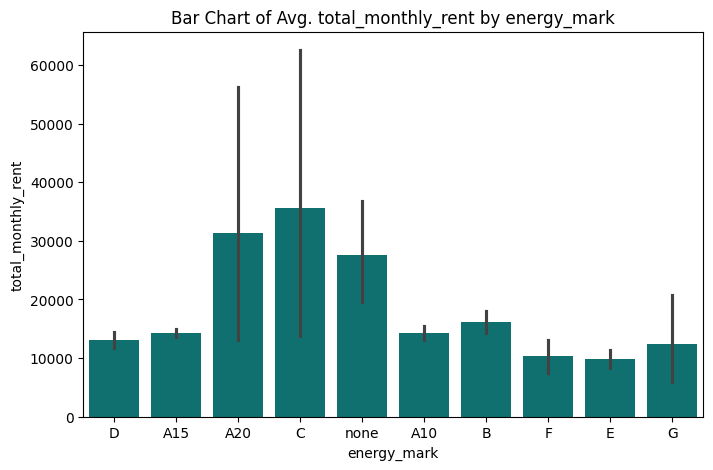

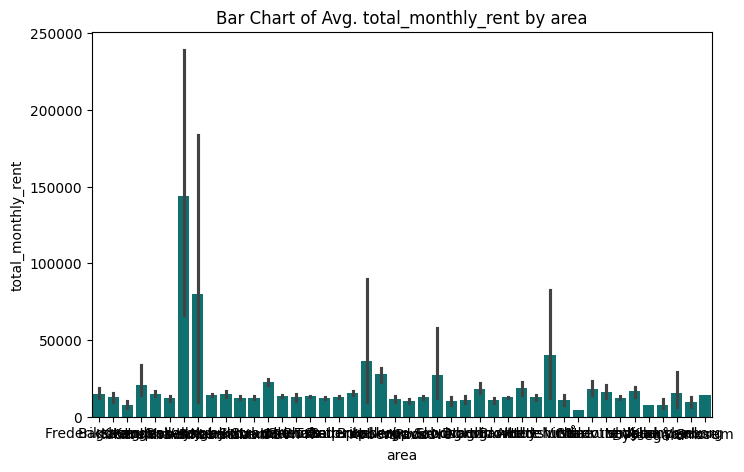

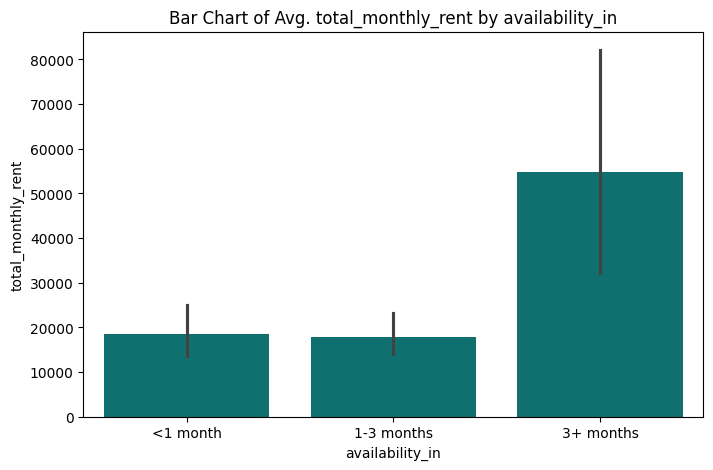

In [79]:
# 5. Bar charts of continuous variables by discrete variables
discrete_vars = df.select_dtypes(include=['object']).columns.tolist() 
continuous_var = 'total_monthly_rent' # We choose only the dependent variable we later want to predict

# Creating bar charts
for discrete_var in discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=continuous_var, data=df, color='teal')
    plt.title(f'Bar Chart of Avg. {continuous_var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(continuous_var)
    plt.show()

In [76]:
df1 = df.drop(columns=[col for col in continuous_ratio_vars if col!='size_sqm'])

In [77]:
df1.to_csv('preprocessed_log_data.csv', index=False, header=True, encoding='utf-8')